In [ ]:
import numpy as np

# Inputs
x1, x2 = 0.6, 0.1
y = 1

# Parameters
w1, w2, b = 0.2, -0.3, 0.4
lr = 0.1

# Sigmoid
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Forward pass
z = w1*x1 + w2*x2 + b
y_pred = sigmoid(z)

# Loss derivative
dL_dy_pred = y_pred - y

# Sigmoid derivative
Dy_pred_dz = y_pred*(1-y_pred)

# Chain rule
dL_dz = dL_dy_pred * Dy_pred_dz

# Gradients
dL_dw1 = dL_dz * x1
dL_dw2 = dL_dz * x2
dL_db = dL_dz

# Update
w1 -= lr*dL_dw1
w2 -= lr*dL_dw2
b  -= lr*dL_db

print(w1, w2, b)

0.20536959297953516 -0.2991050678367441 0.4089493216325586


In [5]:
from google.colab import files

uploaded = files.upload()

Saving spam_or_not_spam.csv to spam_or_not_spam (1).csv


Before Cleaning Shape: (3000, 2)
After Cleaning Shape: (2999, 2)


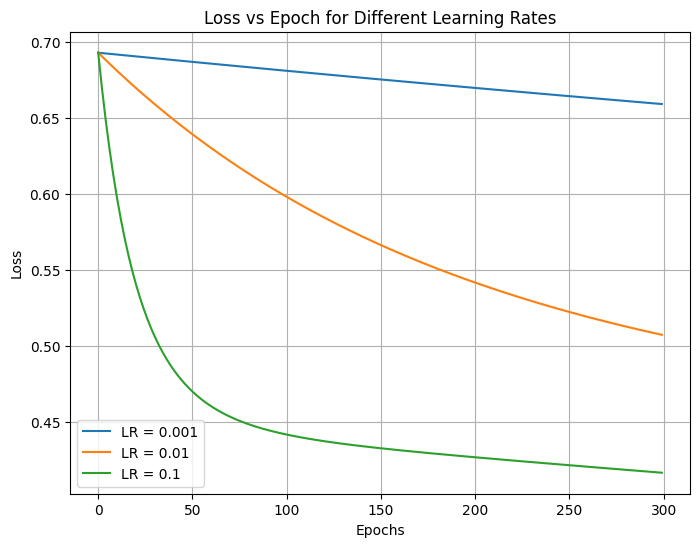

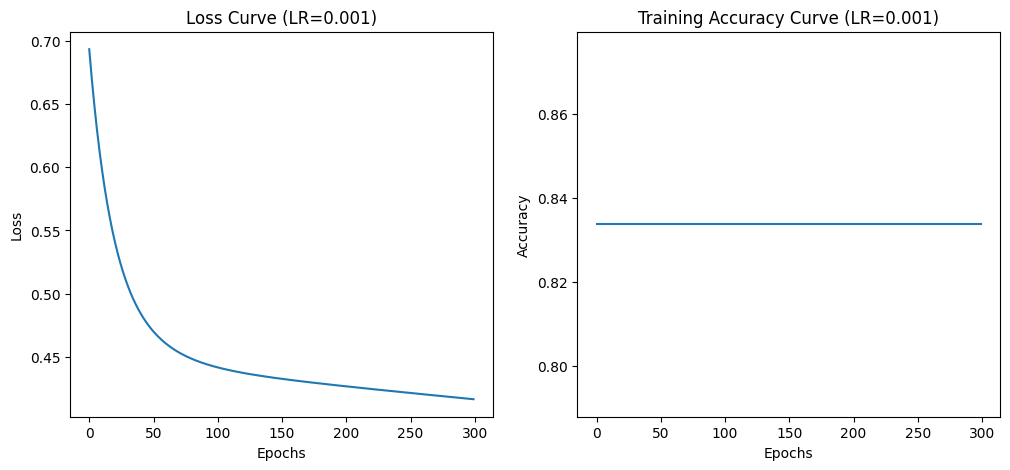

Final Test Accuracy: 0.8333333333333334


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("spam_or_not_spam.csv")

print("Before Cleaning Shape:", df.shape)

df = df.dropna()
df['email'] = df['email'].astype(str)

print("After Cleaning Shape:", df.shape)

X_text = df['email']
y = df['label'].values.reshape(-1, 1)

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
X = vectorizer.fit_transform(X_text).toarray()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    m = len(y)
    return - (1/m) * np.sum(y*np.log(y_pred+1e-9) + (1-y)*np.log(1-y_pred+1e-9))

def compute_accuracy(y, y_pred):
    preds = (y_pred > 0.5).astype(int)
    return np.mean(preds == y)

def train(X, y, lr, epochs=300):
    m, n = X.shape
    W = np.zeros((n, 1))
    b = 0

    losses = []
    accuracies = []

    for i in range(epochs):
        z = np.dot(X, W) + b
        y_pred = sigmoid(z)

        loss = compute_loss(y, y_pred)
        acc = compute_accuracy(y, y_pred)

        losses.append(loss)
        accuracies.append(acc)

        dW = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)

        W = W - lr * dW
        b = b - lr * db

    return W, b, losses, accuracies


learning_rates = [0.001, 0.01, 0.1]
loss_dict = {}

plt.figure(figsize=(8,6))

for lr in learning_rates:
    W, b, losses, accs = train(X_train, y_train, lr)
    loss_dict[lr] = losses

    plt.plot(losses, label=f"LR = {lr}")

plt.title("Loss vs Epoch for Different Learning Rates")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.show()


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(losses)
plt.title(f"Loss Curve (LR={best_lr})")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(accs)
plt.title(f"Training Accuracy Curve (LR={best_lr})")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()

print("Final Test Accuracy:", results[best_lr])